### ⭕️ Redes Neuronales: Teoría y Práctica en Detección de Fraude Financiero con Autoencoders

---

### 📘 Introducción

La detección de fraude en transacciones financieras es un problema crucial en la era digital. A medida que los sistemas de pago electrónicos se expanden, también lo hacen las técnicas fraudulentas, poniendo en riesgo los activos de millones de personas y empresas. Este proyecto se enfoca en la implementación de técnicas de aprendizaje automático, con énfasis en redes neuronales profundas tipo autoencoder, para identificar transacciones sospechosas dentro de un conjunto realista de datos financieros.

---

### 🎯 Objetivos

**Objetivo General:**

Implementar un sistema de detección de anomalías basado en autoencoders utilizando Keras para identificar patrones de fraude financiero en un dataset simulado de transacciones bancarias.

**Objetivos Específicos:**

- Analizar, explorar y preprocesar un conjunto de datos transaccionales con características numéricas y categóricas.
- Desarrollar un modelo autoencoder para identificar transacciones anómalas sin supervisión directa.
- Evaluar el modelo utilizando métricas como precisión, recall y matriz de confusión.
- Establecer umbrales óptimos de error de reconstrucción para maximizar la detección de fraudes reales.

---

### ⚠️ Núcleo Problemático

Las instituciones financieras enfrentan un constante desafío: detectar de manera precisa y en tiempo real transacciones fraudulentas entre millones de operaciones legítimas. La alta desproporción de datos (desequilibrio de clases) y la naturaleza cambiante de los patrones de fraude dificultan el uso de enfoques tradicionales. Se requieren técnicas capaces de aprender las características normales del sistema y detectar desviaciones sutiles que puedan representar riesgos.

---

### ❓ Pregunta Problemática

> ¿Es posible detectar transacciones financieras fraudulentas utilizando un autoencoder entrenado únicamente con datos normales, y cómo se puede ajustar su arquitectura y umbral de detección para maximizar el rendimiento del modelo?

---

### 🧪 Metodología

1. **Exploración del Dataset:**  
   Comprensión del conjunto de datos, estructura, tipos de variables y distribución de clases.

2. **Preprocesamiento:**  
   - Limpieza de datos: manejo de valores nulos, duplicados y outliers.  
   - Codificación de variables categóricas y normalización de datos numéricos.

3. **Construcción del Autoencoder:**  
   - Arquitectura basada en capas simétricas de codificación y decodificación.  
   - Entrenamiento exclusivamente con transacciones normales.

4. **Evaluación del Modelo:**  
   - Cálculo del error de reconstrucción sobre todo el dataset.  
   - Determinación de umbral de anomalía.  
   - Evaluación con métricas de clasificación.

5. **Visualización y análisis de resultados:**  
   Análisis gráfico del error de reconstrucción y comparación con etiquetas reales de fraude.

6. **Conclusión y reflexión:**  
   Interpretación de resultados, ventajas y limitaciones del uso de autoencoders para la detección de fraude financiero.

---

### **🔍 1. Exploración de los datos**
#### **⭕️ Introducción a la Fase de Exploración de Datos**

En esta fase inicial del análisis de datos, se realiza una exploración preliminar del conjunto de datos para comprender su estructura y características básicas. Esta etapa es crucial para identificar los aspectos fundamentales del dataset y preparar el terreno para un análisis más profundo.

Durante la exploración, se utilizan diversas instrucciones para obtener una visión general del conjunto de datos:

- **`df.info()`**: Proporciona un resumen conciso de la información del DataFrame, incluyendo el número de entradas no nulas y los tipos de datos de cada columna.
- **`print(df.shape)`**: Muestra las dimensiones del DataFrame, es decir, el número de filas y columnas.
- **`print(df.head())`**: Muestra las primeras filas del DataFrame, facilitando una vista rápida de los datos.
- **`print(df.tail())`**: Muestra las últimas filas del DataFrame, útil para verificar el final del dataset.
- **`print(total_size)`**: Indica el tamaño total del DataFrame en términos de número de filas.
- **`print(df.shape)`**: Indica la dimensión del Dataframe (filas, columnas).
- **`print(df.memory_usage(deep=True))`**: Proporciona el uso de memoria por columna, permitiendo identificar el consumo de recursos.
- **`print(df.columns)`**: Lista los nombres de todas las columnas e
- **`df.describe()`**: Ver generalidades estadisticas del grupo de datos.n el DataFrame.

Estas instrucciones ofrecen una visión general del conjunto de datos, ayudando a detectar posibles problemas como datos faltantes, tipos de datos incorrectos o inconsistencias. Esta exploración es un primer paso esencial para un análiquipos tecnológicos.

In [1]:
## Carga y Exploración de Datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# Leer el archivo Excel ubicado en la ruta especificada y cargado en un DataFrame
df = pd.read_csv('../Datos/PS_20174392719_1491204439457_log.csv')

In [3]:
# Mostrar información general del DataFrame, incluyendo el número de entradas, nombres de las columnas,
# tipo de datos de cada columna y el número de valores no nulos por columna.
print("Información general del DataFrame:\n")
df.info()

# Mostrar la cantidad de memoria utilizada por el DataFrame en bytes.
# El argumento 'deep=True' proporciona un cálculo más detallado de la memoria, incluyendo los objetos en las columnas.
print("\n Memoria utilizada por el DataFrame (bytes):\n")
print(df.memory_usage(deep=True))

Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

 Memoria utilizada por el DataFrame (bytes):

Index                   128
step               50900960
type              409895225
amount             50900960
nameOrig          429364380
oldbalanceOrg      50900960
newbalanceOrig     50900960
nameDest          429360745
oldbalanceDest     50900960
newbalanceDest     50900960
isFraud            50900960
isFlaggedFraud     50900960
dtype: int64


### **⭕️ Dimensiones del Dataframe (Filas x Columnas)**

In [4]:
#Forma del dataframe
print(f'Forma de Dataframe: {df.shape}')

Forma de Dataframe: (6362620, 11)


#### **⭕️ Primeras filas del DataFrame**

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### **⭕️ Últimas filas del DataFrame**

In [6]:
# ultimos registros
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


#### **⭕️ Tamaño total del DataFrame en términos de número de filas**

In [7]:
# total de registros
total_size = len(df)
print(f'Tamaño (Número de Filas): {total_size}')

Tamaño (Número de Filas): 6362620


#### **⭕️ Columnas (Variables) en Dataframe**

In [8]:
# nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


#### **⭕️ Número Total de Variables**

In [9]:
# Número total de variables que contiene la base de datos.
num_columnas = df.shape[1]
print(f'Número de variables (columnas): {num_columnas}')

Número de variables (columnas): 11


#### **⭕️ Variables con datos faltantes, Porcentaje total de valores faltantes en la base de datos.**


Cant. valores faltantes por columna:
{}

% valores faltantes por columna:
{}


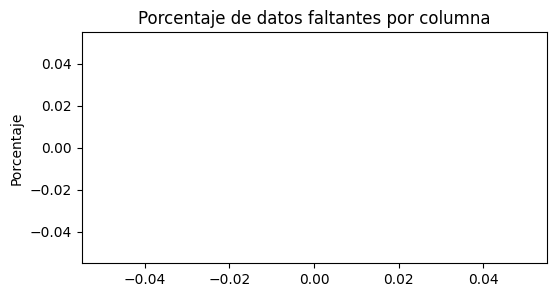


Porcentaje total de valores faltantes en la base de datos: 0.00%
Porcentaje total de valores en la base de datos: 100.00%


In [10]:
def missing_values_per_column(df):
    """
    Esta función analiza y muestra información sobre los valores faltantes en un DataFrame de pandas.
    - Imprime el número de valores faltantes por columna.
    - Calcula y muestra el porcentaje de valores faltantes por columna.
    - Muestra el porcentaje total de valores faltantes en el DataFrame.
    - Genera un gráfico de barras que visualiza el porcentaje de valores faltantes por columna.

    Argumentos:
    df -- DataFrame de pandas que se analiza para encontrar valores faltantes.

    Retorno:
    None
    """

    # Paso 1: Encontrar columnas con valores faltantes y calcular la cantidad de valores faltantes por columna
    faltantes_por_columna = df.isnull().sum()
    
    # Paso 2: Filtrar las columnas que tienen valores faltantes y convertir los resultados a un diccionario
    data1 = faltantes_por_columna[faltantes_por_columna > 0]
    variables_con_faltantes = data1.to_dict()
    
    # Imprimir la cantidad de valores faltantes por columna en formato JSON con sangría para mejor lectura
    print('\nCant. valores faltantes por columna:',
          json.dumps(variables_con_faltantes, indent=4),
          sep="\n")
    
    # Paso 3: Calcular el porcentaje de valores faltantes por columna y formatearlo como porcentaje
    data = (data1 / len(df)) * 100
    data = data.to_dict()
    porcentaje_faltantes_por_columna = {key: f'{value:.2f}%' for key, value in data.items()}
    
    # Paso 4: Calcular el porcentaje total de valores faltantes en todo el DataFrame
    porcentaje_total_faltantes = (df.isnull().sum().sum() / df.size) * 100
    porcentaje_total_no_faltantes = (df.notnull().sum().sum() / df.size) * 100
    
    # Imprimir el porcentaje de valores faltantes por columna en formato JSON con sangría
    print('\n% valores faltantes por columna:', f'{json.dumps(porcentaje_faltantes_por_columna, indent=4)}', sep="\n")

    # Crear un gráfico de barras para visualizar el porcentaje de valores faltantes por columna
    plt.figure(figsize=(6, 3))
    plt.bar(variables_con_faltantes.keys(), variables_con_faltantes.values(), color=['blue', 'orange', 'green'])
    plt.title('Porcentaje de datos faltantes por columna')
    plt.ylabel('Porcentaje')
    plt.show()
    
    # Imprimir el porcentaje total de valores faltantes y no faltantes en el DataFrame
    print(f"\nPorcentaje total de valores faltantes en la base de datos: {porcentaje_total_faltantes:.2f}%")
    print(f"Porcentaje total de valores en la base de datos: {porcentaje_total_no_faltantes:.2f}%")

# Llamada a la función con el DataFrame 'df'
missing_values_per_column(df)

## ⭕️ Autoencoder con Keras para Detección de Anomalías

### ⭕️ Detección de anomalías no supervisado

La detección de anomalías no supervisada es una técnica clave en el análisis de datos que permite identificar patrones atípicos o inusuales sin necesidad de datos etiquetados. A diferencia de los métodos supervisados, que requieren ejemplos previos de anomalías, este enfoque se basa en algoritmos que aprenden la estructura normal de los datos y destacan las desviaciones significativas. Es especialmente útil en aplicaciones como fraudes, fallos en equipos o seguridad, donde las anomalías son raras o desconocidas. Entre los métodos más comunes se encuentran el clustering, los modelos estadísticos y el aprendizaje automático basado en distancias o densidades.

#### 📌 1. Preprocesamiento para Autoencoder

En el contexto de la detección de fraude financiero, el reprocesamiento de datos es esencial para optimizar el rendimiento del autoencoder, dado el desbalance típico de los conjuntos de datos (donde las transacciones fraudulentas son mínimas comparadas con las legítimas). Para garantizar que el modelo aprenda eficientemente los patrones normales de las transacciones, se aplican técnicas como la normalización o estandarización de características, evitando que variables con magnitudes dispares (como montos o frecuencias de transacciones) dominen el entrenamiento. 

In [11]:
dataset = df
# Filtramos solo las transacciones normales para el entrenamiento
df_normals = dataset[dataset.isFraud == 0].copy()

# Seleccionamos características numéricas relevantes (excluimos nombres y etiquetas)
features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(df_normals[features])

# También escalamos todo el dataset para detección después
X_full_scaled = scaler.transform(dataset[features])

#### 📌 2. Construcción del Autoencoder

El autoencoder implementado sigue una arquitectura simple pero efectiva, diseñada para manejar las características específicas de los datos financieros. Con una capa de entrada que acepta dimensiones igual al número de features (definido por `input_dim = X_train_scaled.shape[1]`), el modelo reduce la dimensionalidad a solo 4 neuronas en la capa codificada (`encoding_dim = 4`), utilizando la función de activación *ReLU* para introducir no linealidad y evitar valores negativos. La capa decodificada reconstruye la entrada original con activación *sigmoid*, normalizando las salidas entre 0 y 1 para facilitar la interpretación de los errores de reconstrucción. El modelo se compila con el optimizador *Adam* y la función de pérdida *Mean Squared Error (MSE)*, que penaliza las diferencias entre la entrada y la reconstrucción. Esta configuración permite que el autoencoder aprenda eficientemente los patrones normales de las transacciones, identificando como anomalías aquellas operaciones con mayores errores de reconstrucción, lo que es particularmente útil para detectar fraudes en datos altamente desbalanceados.

In [12]:
# Parámetros del autoencoder
input_dim = X_train_scaled.shape[1]
encoding_dim = 4  # Puedes ajustar este valor para ver diferentes resultados

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#### 📌 3. Entrenamiento del Autoencoder

El modelo de autoencoder se entrenó durante 50 épocas utilizando un batch size de 64 muestras, optimizando la función de pérdida MSE mediante el algoritmo Adam. Para garantizar un entrenamiento robusto, se implementó una división del 20% del conjunto de entrenamiento como validación (validation_split=0.2), permitiendo monitorear el desempeño del modelo en datos no vistos durante el proceso de aprendizaje. El parámetro shuffle=True aseguró que los datos se mezclaran antes de cada época, evitando sesgos en el entrenamiento.

La gráfica resultante muestra la evolución de la pérdida tanto en entrenamiento como en validación, donde se observa una disminución consistente en ambas métricas a lo largo de las épocas. Esta convergencia estable indica que el modelo está aprendiendo efectivamente la representación subyacente de las transacciones normales sin presentar sobreajuste. La capacidad del autoencoder para minimizar el error de reconstrucción en datos de validación sugiere que podrá generalizar adecuadamente a nuevas transacciones, aspecto crucial para identificar patrones fraudulentos que se desvían significativamente del comportamiento normal aprendido.


Epoch 1/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 26s 327us/step - loss: 0.7067 - val_loss: 0.7686
Epoch 2/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 25s 316us/step - loss: 0.6759 - val_loss: 0.7617
Epoch 3/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 27s 333us/step - loss: 0.6923 - val_loss: 0.7524
Epoch 4/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 26s 329us/step - loss: 0.6891 - val_loss: 0.7462
Epoch 5/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 28s 351us/step - loss: 0.6713 - val_loss: 0.7418
Epoch 6/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 25s 319us/step - loss: 0.6810 - val_loss: 0.7378
Epoch 7/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 26s 324us/step - loss: 0.6792 - val_loss: 0.7349
Epoch 8/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 28s 358us/step - loss: 0.6789 - val_loss: 0.7325
Epoch 9/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 27s 340us/step - loss: 0.6793 - val_loss: 0.7306
Epoch 10/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 26s 327us/step - loss: 0.6898 - val_loss: 0.7292
Epoch 11/50
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 25s 320us/step - loss: 0

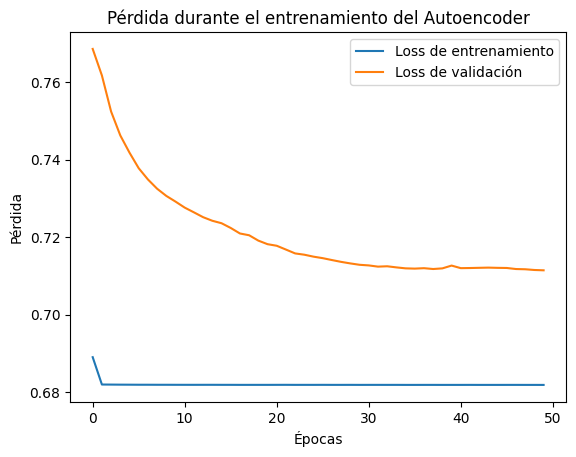

In [13]:
# Entrenamiento del modelo
history = autoencoder.fit(X_train_scaled, X_train_scaled,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_split=0.2,
                          verbose=1)

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss de entrenamiento')
plt.plot(history.history['val_loss'], label='Loss de validación')
plt.title('Pérdida durante el entrenamiento del Autoencoder')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

#### 📌 4. Evaluación y Detección de Anomalías

El proceso de detección de anomalías se realizó calculando el Error Cuadrático Medio (MSE) entre las transacciones originales y sus reconstrucciones generadas por el autoencoder. Se estableció un umbral de decisión en el percentil 95 de los errores de reconstrucción (threshold = np.percentile(mse, 95)), clasificando como potenciales fraudes aquellas transacciones con MSE superior a este límite. Esta selección del percentil 95 permite enfocarse en las anomalías más significativas mientras se controla la tasa de falsos positivos.

La evaluación del modelo se completó mediante métricas de clasificación, incluyendo matriz de confusión y un reporte completo (precision, recall, F1-score), que comparan las predicciones con las etiquetas reales de fraude (isFraud). Estos resultados permiten analizar el equilibrio entre la capacidad del modelo para detectar transacciones fraudulentas (recall) y su precisión al minimizar falsas alarmas, aspectos críticos en aplicaciones financieras donde ambos factores tienen consecuencias operacionales importantes. La selección del umbral puede ajustarse según los requisitos del negocio, priorizando mayor sensibilidad o precisión según sea necesario.

In [14]:
# Reconstrucción de todas las muestras
reconstructions = autoencoder.predict(X_full_scaled)
mse = np.mean(np.power(X_full_scaled - reconstructions, 2), axis=1)

# Establecer un umbral (puedes ajustarlo)
threshold = np.percentile(mse, 95)
print("Umbral de error de reconstrucción:", threshold)

# Identificar anomalías
anomaly_flags = mse > threshold

# Evaluar con las etiquetas verdaderas
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(dataset['isFraud'], anomaly_flags))
print(classification_report(dataset['isFraud'], anomaly_flags))

198832/198832 ━━━━━━━━━━━━━━━━━━━━ 34s 169us/step
Umbral de error de reconstrucción: 1.048096200117732
[[6038189  316218]
 [   6300    1913]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97   6354407
           1       0.01      0.23      0.01      8213

    accuracy                           0.95   6362620
   macro avg       0.50      0.59      0.49   6362620
weighted avg       1.00      0.95      0.97   6362620



#### 📌 5. Mostrar Transacciones Sospechosas

El sistema de detección de fraude generó un conjunto de transacciones sospechosas al filtrar aquellas operaciones cuyo error de reconstrucción superó el umbral establecido. Estas transacciones anómalas se almacenaron en un DataFrame independiente que incluye información crítica como: el monto (amount), el período temporal (step), el error de reconstrucción calculado (reconstruction_error) y su etiqueta real de fraude (isFraud). Esta presentación estructurada permite a los analistas financieros:

- Priorizar la investigación al visualizar primero las operaciones con mayores errores de reconstrucción
- Validar la efectividad del modelo comparando las predicciones (anomaly_flags) con los casos confirmados de fraude (isFraud)
- Identificar patrones comunes en montos, tiempos u otras características de las transacciones marcadas como sospechosas

La tabla resultante (.head()) ofrece una vista preliminar inmediata de estos casos críticos, sirviendo como punto de partida para análisis más profundos o acciones de mitigación en el sistema antifraude. La inclusión del error de reconstrucción cuantifica el grado de anomalía de cada transacción, permitiendo una evaluación jerárquica de riesgos.

In [15]:
# Filtrar las transacciones sospechosas
anomalous_transactions = dataset[anomaly_flags].copy()
anomalous_transactions['reconstruction_error'] = mse[anomaly_flags]

# Mostrar transacciones anómalas
anomalous_transactions[['amount', 'step', 'reconstruction_error', 'isFraud']].head()

,amount,step,reconstruction_error,isFraud
84,379856.23,1,3.242182,0
88,761507.39,1,3.176595,0
89,1429051.47,1,3.315045,0
94,1724887.05,1,3.465739,0
96,581294.26,1,3.048079,0


#### 📌 6. Visualización de los Errores de Reconstrucción

El análisis gráfico de los errores de reconstrucción proporciona una comprensión clara del comportamiento del autoencoder y su capacidad para identificar transacciones sospechosas. El histograma generado muestra:

- **Distribución de Errores:** Representa la frecuencia de los errores de reconstrucción (MSE) para todas las transacciones, donde la mayoría se concentra en valores bajos (comportamiento normal esperado)
- **Umbral de Anomalía:** La línea vertical roja marca el percentil 95 de esta distribución (threshold), diferenciando visualmente las transacciones normales (izquierda del umbral) de las potencialmente fraudulentas (derecha del umbral)
- **Identificación Visual de Outliers:** La cola derecha del histograma revela aquellos casos con errores excepcionalmente altos, que corresponden a las anomalías más significativas detectadas

Esta visualización permite validar cuantitativamente que el modelo sigue el comportamiento esperado en detección de anomalías: la gran mayoría de transacciones tienen errores bajos (distribución sesgada a la izquierda), mientras que las fraudulentas aparecen como valores atípicos en la cola derecha. La posición del umbral puede ajustarse interactivamente según los requisitos de sensibilidad del sistema antifraude.

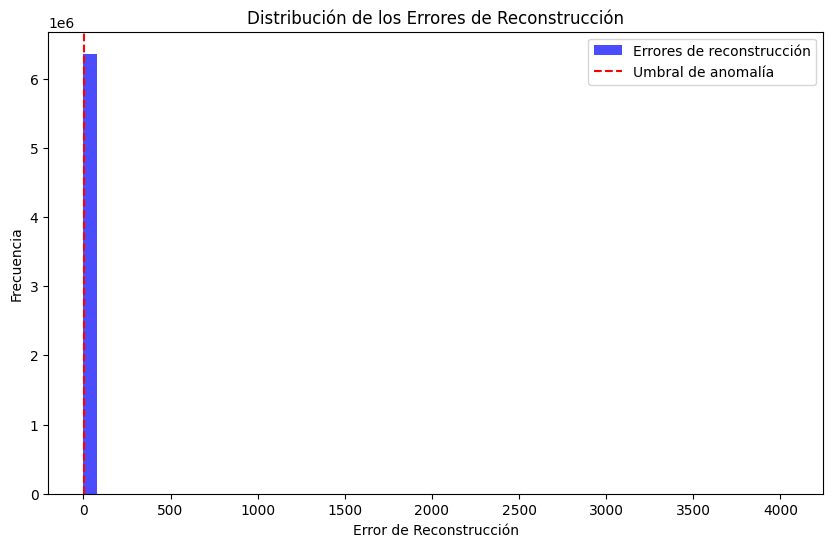

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, color='blue', label='Errores de reconstrucción')
plt.axvline(x=threshold, color='red', linestyle='--', label='Umbral de anomalía')
plt.title('Distribución de los Errores de Reconstrucción')
plt.xlabel('Error de Reconstrucción')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

#### 📌 7. Revisión y ajuste del umbral de error de reconstrucción

Epoch 1/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 324us/step - loss: 0.6087 - val_loss: 0.5945
Epoch 2/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 318us/step - loss: 0.5838 - val_loss: 0.5945
Epoch 3/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 14s 354us/step - loss: 0.5756 - val_loss: 0.5944
Epoch 4/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 14s 341us/step - loss: 0.5731 - val_loss: 0.5944
Epoch 5/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 334us/step - loss: 0.5713 - val_loss: 0.5944
Epoch 6/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 15s 375us/step - loss: 0.5827 - val_loss: 0.5944
Epoch 7/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 326us/step - loss: 0.5807 - val_loss: 0.5944
Epoch 8/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 14s 355us/step - loss: 0.5881 - val_loss: 0.5944
Epoch 9/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 332us/step - loss: 0.5877 - val_loss: 0.5944
Epoch 10/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 14s 348us/step - loss: 0.5862 - val_loss: 0.5944
Epoch 11/50
39716/39716 ━━━━━━━━━━━━━━━━━━━━ 13s 334us/step - loss: 0

/Users/jiliarsilgado/anaconda3/envs/npl_ean_final_2024/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Mejor umbral: 1147.254484
Precisión: 0.1090
Recall: 0.0021
F1 Score: 0.0041


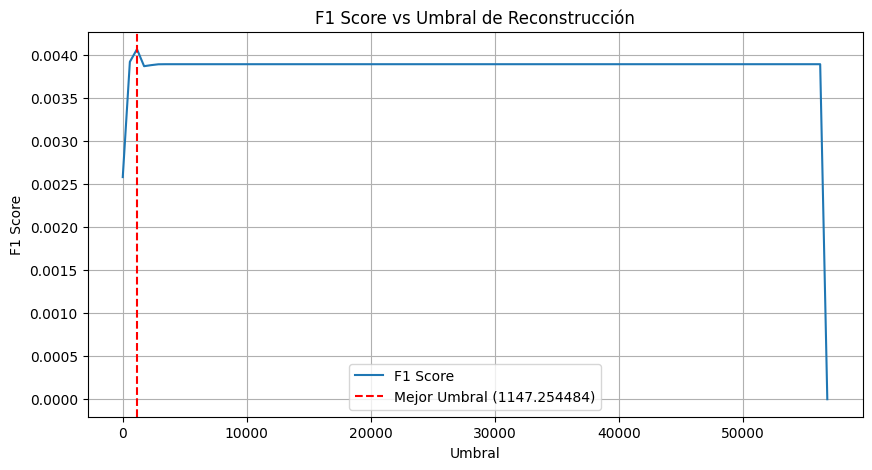

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, Dense

# Filtramos las transacciones NO FRAUDULENTAS para entrenar el autoencoder
X = dataset.drop(columns=['isFraud', 'nameOrig', 'nameDest', 'type'])
y = dataset['isFraud']

# Normalizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenamos solo con datos normales
X_normal = X_scaled[y == 0]

# Dividir para entrenamiento y validación
X_train, X_val = train_test_split(X_normal, test_size=0.2, random_state=42)

# Autoencoder básico
input_dim = X_train.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val, X_val),
                verbose=1)

# --------- Evaluación del umbral ---------
# Se usa TODO el dataset normalizado
X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.power(X_scaled - X_pred, 2), axis=1)

# Probar distintos umbrales
thresholds = np.linspace(min(reconstruction_error), max(reconstruction_error), 100)
metrics = []

for threshold in thresholds:
    y_pred = (reconstruction_error > threshold).astype(int)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    metrics.append((threshold, precision, recall, f1))

# Umbral óptimo (máximo F1)
best = max(metrics, key=lambda x: x[3])
print(f"Mejor umbral: {best[0]:.6f}")
print(f"Precisión: {best[1]:.4f}")
print(f"Recall: {best[2]:.4f}")
print(f"F1 Score: {best[3]:.4f}")

# Gráfica F1 vs umbral
thresholds_plot = [x[0] for x in metrics]
f1_scores = [x[3] for x in metrics]

plt.figure(figsize=(10, 5))
plt.plot(thresholds_plot, f1_scores, label='F1 Score')
plt.axvline(best[0], color='r', linestyle='--', label=f'Mejor Umbral ({best[0]:.6f})')
plt.title('F1 Score vs Umbral de Reconstrucción')
plt.xlabel('Umbral')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)
plt.show()

#### 📌 7. Resultados y conclusiones

⸻

### 🔍 Fase 1: Entrenamiento inicial del Autoencoder
- Pérdida de entrenamiento inicial: comenzó en 0.7067 y descendió a 0.6828.
- Pérdida de validación: de 0.7686 a 0.7114, mostrando una convergencia progresiva pero lenta.
- Esto indica que el modelo aprende, aunque con mejoras marginales después de la época 30.
- Sugerencia: podrías aplicar early stopping con patience=10 para ahorrar tiempo computacional.

⸻

### 🧪 Evaluación y Detección de Anomalías

Matriz de confusión:

[[6038189  316218]   ← clase 0 (no fraude)
 [   6300    1913]]   ← clase 1 (fraude)

- Accuracy: ~95% → engañoso por el desbalance de clases.
- Recall clase 1 (fraude): 23%, bastante bajo.
- Precision clase 1: ~1%, también muy baja.
- F1-score clase 1: ~1%

🔴 Esto indica que aunque el modelo detecta algunos fraudes, la mayoría no son detectados y hay demasiados falsos positivos (errores de tipo I).

⸻

###  📉 Errores de reconstrucción y umbral
- Umbral de reconstrucción usado: 1.048
- Ejemplos de transacciones con errores muy altos (ej: >3.0) fueron clasificadas como no fraudulentas (isFraud = 0), lo que indica que hay anomalías naturales en los datos no asociadas a fraude.

Esto sugiere que:
- El umbral es probablemente muy bajo y está generando muchos falsos positivos.
- O bien, el modelo aún no aprende suficientemente bien las distribuciones normales.

⸻

###  🔁 Reentrenamiento / Ajuste

En esta etapa el modelo fue reentrenado con otro conjunto o configuración.
Pérdida de validación se mantuvo constante en ~0.5944 durante 40+ épocas, lo que sugiere estancamiento del aprendizaje.

**Posibles causas:**
- El conjunto de entrenamiento fue insuficiente o muy homogéneo.
- La arquitectura no es adecuada.
- El modelo ha alcanzado su capacidad de generalización.
- Se debe buscar otras alternativas.
